<a href="https://colab.research.google.com/github/ASaragga/ARE/blob/main/FCL01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
using Pkg
Pkg.add(["MonteCarloMeasurements", "Distributions"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [111]:
using MonteCarloMeasurements, Distributions, Plots

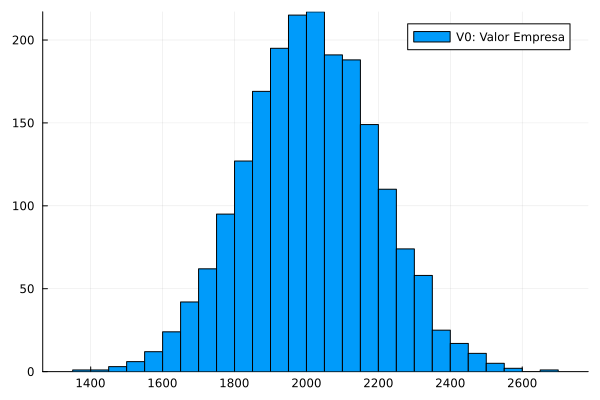

In [112]:
FCL1 = 100 * (1 ± 0.05)   #  Aqui ± representa uma distribuição normal N(0, 0.05)
FCL2 = 115 * (1 ± 0.07)
FCL3 = 130 * (1 ± 0.10)

WACC = 0.09
g = 0.03

V3 = FCL3*(1+g)/(WACC-g)  # Perpetuidade
V0 = FCL1/(1+WACC) + FCL2/(1+WACC)^2 + FCL3/(1+WACC)^3 + V3/(1+WACC)^3

graf01 = plot(V0,label="V0: Valor Empresa")

In [113]:
println("média V0 = ", pmean(V0))
println("desvio-padrão V0 = ", pstd(V0))
println("VaR(5%) V0 = ", pquantile(V0, 0.05))

média V0 = 2012.1763039025893
desvio-padrão V0 = 182.73157426909495
VaR(5%) V0 = 1712.8484864831748


Modelo de Fluxos de Caixa Atualizados (Discounted Cash Flows) Genérico

In [114]:
function DCF(FC, WACC, g)
    H = length(FC) # Número de fluxos de caixa livres projectados até ao horizonte H

    # Descontando os fluxos de caixa livres até ao horizonte
    FC_descontados = sum(FC[t] / (1 + WACC)^t for t in 1:H)

    # Valor no Horizonte VH assumindo uma perpetuidade
    VH = FC[end] * (1 + g) / (WACC - g)
    VH_descontado = VH / (1 + WACC)^H

    # Valor da empresa
    V = FC_descontados + VH_descontado
    return V
end

DCF (generic function with 2 methods)

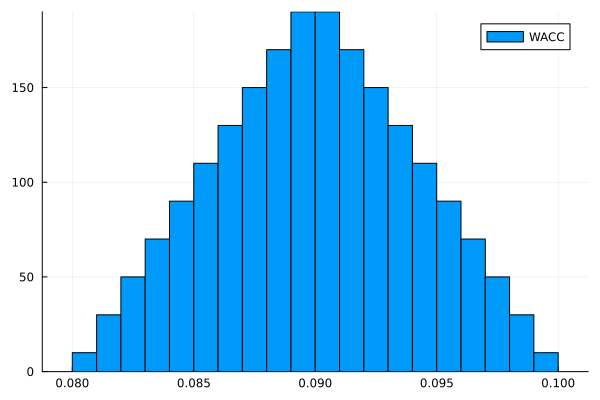

In [115]:
WACC = Particles(2000, TriangularDist(0.08,0.10,0.09))
plot(WACC, label = "WACC")

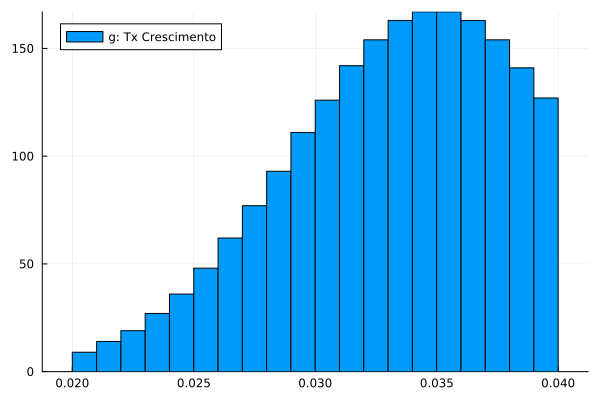

In [116]:
# g <- Distribuição Normal(0.035,0.006) truncada entre 0.02 e 0.04
g = Particles(2000, truncated(Normal(0.035,0.006), 0.02, 0.04))
plot(g, label = "g: Tx Crescimento")

In [117]:
V0 = DCF([FCL1, FCL2, FCL3],WACC,g)

2130.96 ± 294.0 Particles{Float64, 2000}


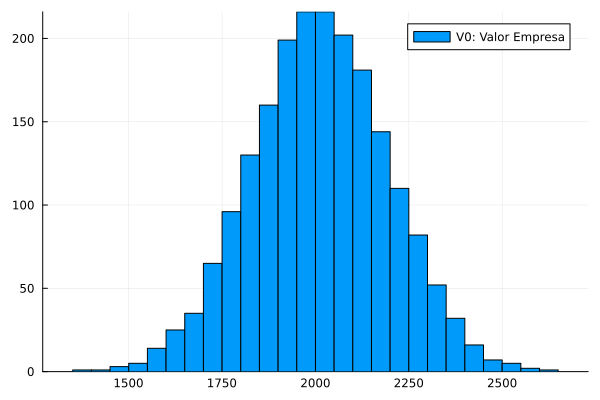

In [99]:
graf02 = plot(V0,label="V0: Valor Empresa")

In [118]:
println("média V0 = ", pmean(V0))
println("desvio-padrão V0 = ", pstd(V0))
println("VaR(5%) V0 = ", pquantile(V0, 0.05))

média V0 = 2130.9588678772925
desvio-padrão V0 = 294.34155419213016
VaR(5%) V0 = 1684.7276468856728
